In [1]:
from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()

In [3]:
print(f"iris_datasets의 키: {iris_dataset.keys()}")

iris_datasets의 키: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print(f"타깃의 이름: {iris_dataset['target_names']}")

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [9]:
# 0: setosa, 1: versicolor, 2: virginica
print("target의 크기: \n{}".format(iris_dataset["target"]))

target의 크기: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


scikit-learn은 데이터셋을 섞어서 나눠주는 train_test_split 함수를 제공.  
이 함수는 전체 행 중 75%를 레이블 데이터와 함께 훈련 세트로 뽑음.  

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [12]:
print(f'X_train 크기: {X_train.shape}')
print(f'y_train 크기: {y_train.shape}')

X_train 크기: (112, 4)
y_train 크기: (112,)


## 가장 먼저 할 일: 데이터 살펴보기

* 머신러닝 모델을 만들기 전에 머신러닝 없이도 풀 수 있는 문제는 아닌지, 혹은 필요한 정보가 누락되지 않았는지 데이터를 조사해보는 것이 좋음.     
* 데이터를 탐색하면서 비정상적인 값이나 특이한 값들을 찾을 수도 있음.  
* 예를들어 붓꽃 데이터 중 일부는 단위가 다를 수가 있음.  
* 실제로 데이터에 일관성이 없거나 이상한 값이 들어가 있는 경우가 종종 있음.  
<br>

* 시각화는 데이터를 조사하는 아주 좋은 방법.   
* 산점도가 그중 하나임.   
* 산점도는 데이터에서 한 특성을 x축에 놓고 다른 하나는 y축에 놓아 각 데이터 포인트를 하나의 점으로 나타내는 그래프.     
* 아쉽게도 컴퓨터 화면은 2차원이라 한 번데 2개의 특성만 그릴 수 있음.   
* 산점도 행렬은 한 그래프에 모든 특성의 관계가 나타는 것이 아니기 때문에 각각의 나누어진 산점도 그래프에는 드러나지 않는 중요한 성질이 있을 수 있음.  

In [19]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

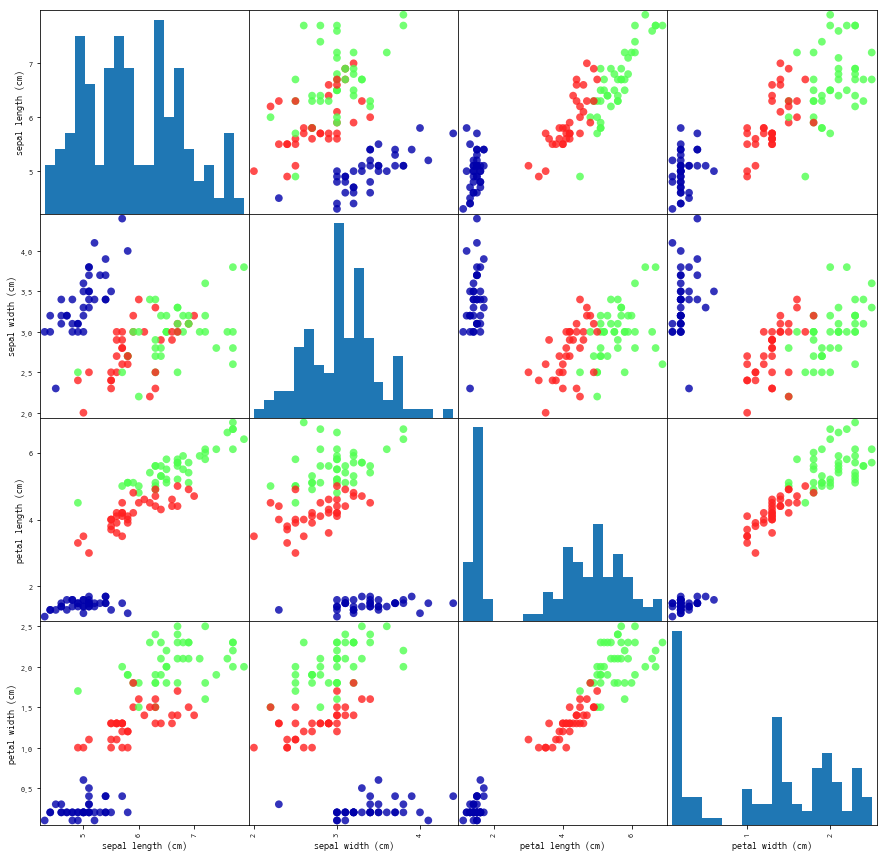

In [20]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

## 첫 번째 머신러닝 모델: k-최근접 이웃 알고리즘

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# model 객체 생성
knn = KNeighborsClassifier(n_neighbors=1)

# model fit
knn.fit(X_train, y_train)

# X_new 생성
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)

print(f"예측: {prediction}")
print("예측한 타깃의 이름: {}".format(iris_dataset["target_names"][prediction]))

y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값: \n{}".format(y_pred))

# option1
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

# option2
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

예측: [0]
예측한 타깃의 이름: ['setosa']
테스트 세트에 대한 예측값: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도: 0.97
테스트 세트의 정확도: 0.97
